PROYECTO DE BI PARA ESCUELA DEPORTIVA, TABLA SEDE

PAQUETES E IMPORTACIONES A UTILIZAR

In [1]:
#crear entorno virtual en la carpeta del proyecto:
# python -m venv env o mi_entorno
# env/Script/Activate         para activar el entorno virtual en windows
# source env/bin/activate     para activar en linux
#instalar las siguientes librerias

#desactivar / deactivate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #pip install scikit-learn


Cargar los datos

In [2]:
data = pd.read_csv('data/datos_sinprocesar/sede_202510042015.csv')

Visualizar los datos

In [3]:
data.head()

,id_sede,nombre_sede,ubicacion
0,17,Sede Principal,Ciudad A
1,18,Sede kuyTG,Ciudad B
2,19,Sede Principal,Ciudad E
3,20,Sede Principal,Ciudad D
4,21,Sede qzDUcCVh,Ciudad B


Verificar la estructura de los datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_sede      1000 non-null   int64 
 1   nombre_sede  1000 non-null   object
 2   ubicacion    909 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


Estadistico

In [5]:
data.describe()

,id_sede
count,1000.000000
mean,516.500000
std,288.819436
min,17.000000
25%,266.750000
50%,516.500000
75%,766.250000
max,1016.000000


Estadistica de Campos Categoricos

In [6]:
data.describe(include='O')

,nombre_sede,ubicacion
count,1000,909
unique,279,5
top,Sede Principal,Ciudad C
freq,722,195


Visualizar el tamaño del dataset (dataframe)

In [7]:
data.shape

(1000, 3)

OUTLIERS - Modo Grafico

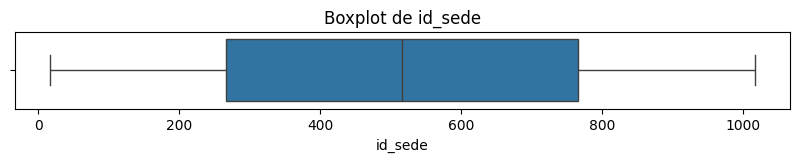

In [8]:
cols = data.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[cols], x=col)
    #sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

OUTLIERS - Calculado

rango intercuartilico IRQ

In [9]:
outliers = {}

for col in cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1  # Rango Intercuartílico

    LI = Q1 - 1.5 * IQR  # Límite inferior
    LS = Q3 + 1.5 * IQR  # Límite superior

    outliers_col = data[(data[col] < LI) | (data[col] > LS)][col]
    outliers[col] = outliers_col

    print(f'{col}: {len(outliers_col)} outliers')
    print(f'  Límites: [{LI:.2f}, {LS:.2f}]')
    print(f'  Min: {data[col].min()}, Max: {data[col].max()}')
    print('-' * 40)

id_sede: 0 outliers
  Límites: [-482.50, 1515.50]
  Min: 17, Max: 1016
----------------------------------------


STR

In [10]:
outliers={}
for col in cols:
  mean=data[col].mean()
  std=data[col].std()

  outliers[col] = (data[col] > (mean + 3 *std)).sum() + (data[col] < (mean - 3 *std)).sum()

print(outliers)

{'id_sede': np.int64(0)}


Histogramas - Outliers

<Axes: xlabel='id_sede', ylabel='Count'>

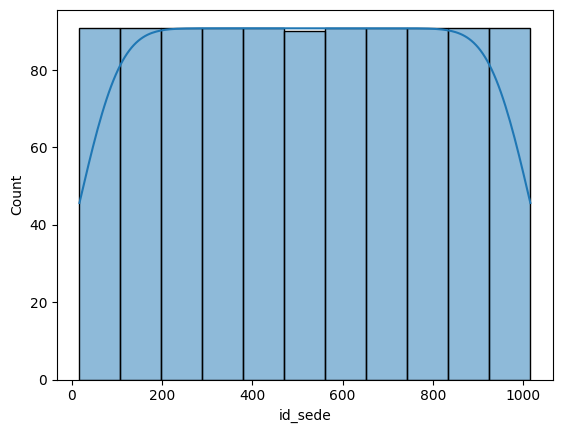

In [13]:
sns.histplot(data=data, x='id_sede', kde=True)

Valores Nulos

In [14]:
data.isna().mean()*100

id_sede        0.0
nombre_sede    0.0
ubicacion      9.1
dtype: float64

Eliminar valores Nulos

In [ ]:
# Eliminar filas con valores nulos en la columna y filas donde el nombre esta vacio (cadena vacia o solo espacios)
data = data[data['nombre_sede'].notna() & (data['nombre_sede'] != '')]
data = data[data['ubicacion'].notna() & (data['ubicacion'] != '')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_sede      909 non-null    int64 
 1   nombre_sede  909 non-null    object
 2   ubicacion    909 non-null    object
dtypes: int64(1), object(2)
memory usage: 28.4+ KB


Eliminar datos inconsistentes

In [40]:
data = data[
    data['nombre_sede'].notna() &
    data['nombre_sede'].str.strip().str.lower().isin(['sede principal'])
]


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_sede      655 non-null    int64 
 1   nombre_sede  655 non-null    object
 2   ubicacion    655 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.5+ KB


Guardar data limpia de valores nulos eliminados

In [42]:
data.to_csv('data/datos_preprocesados/sede.csv', index=False)

Limpieza relacional

In [43]:
alumnos = pd.read_csv('data/datos_procesador/alumno_limpio.csv')


In [44]:
sede = pd.read_csv('data/datos_preprocesados/sede.csv')

In [45]:
ids_sede_validos = alumnos['sede_id'].unique()
sede = sede[sede['id_sede'].isin(ids_sede_validos)]


In [46]:

print('Filas finales en sede:', sede.shape[0])
print('IDs únicos en alumnos:', alumnos['sede_id'].nunique())
print('IDs únicos en sede:', sede['id_sede'].nunique())


Filas finales en sede: 165
IDs únicos en alumnos: 253
IDs únicos en sede: 165


Guardar datos

In [47]:
sede.to_csv('data/datos_procesador/sede_limpia.csv', index=False)